In [64]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [65]:
path='./data/credit-g.csv'
credit_df=pd.read_csv(path)
credit_df.info()
credit_df.columns=[col.strip() for col in credit_df.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13   other_payment_plans    1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

<AxesSubplot:>

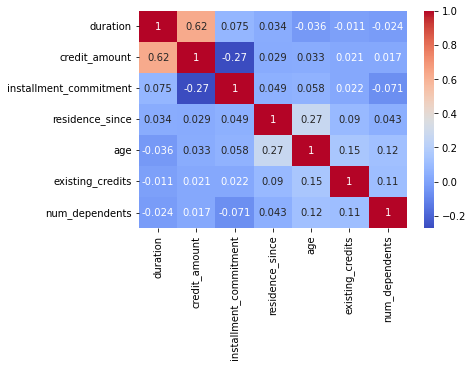

In [72]:
numerical_features=credit_df.select_dtypes(include=['float','int'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [67]:
Categorical_Features=credit_df.select_dtypes(include=['object'])
print('Categorical Features: ',*Categorical_Features.columns,sep='\n')
Categorical_Features.drop(['class'],inplace=True,axis=1)


Categorical Features: 
checking_status
credit_history
purpose
savings_status
employment
personal_status
other_parties
property_magnitude
other_payment_plans
housing
job
own_telephone
foreign_worker
class


c:\Users\Eniac\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
Ordinal_columns=['checking_status'
,'credit_history'
,'savings_status'
,'employment'
,'job'
]
Categorical_Features.drop(Ordinal_columns,inplace=True,axis=1)

Ordinal_Features=credit_df[Ordinal_columns]

In [76]:
def map_the_column(df,column,mapper):
    return df[column].map(mapper)

column='checking_status'
checking_status_map={
    'no checking': 0,
    '<0': 1,
    '0<=X<200': 2,
    '>=200': 3
}
credit_df['checking_status']=map_the_column(credit_df,column,checking_status_map)


credit_history_mapper = {
    'critical/other existing credit': -3,
    'existing paid': 1,
    'delayed previously': -1,
    'no credits/all paid': 3,
    'all paid': 2
}
column='credit_history'
credit_df['credit_history']=map_the_column(credit_df,column,credit_history_mapper)



credit_df['savings_status'].unique()
savings_status_mapper={
    'no known savings':0, 
    '<100':1, 
    '100<=X<500':2,
    '500<=X<1000':3, 
    '>=1000':4, 
}
column='savings_status'
credit_df['savings_status']=map_the_column(credit_df,column,savings_status_mapper)


credit_df['employment'].unique()
employment_map={
    '>=7':4, 
    '4<=X<7':3, 
    '1<=X<4':2, 
    '<1':1,
    'unemployed':-1 
}
column='employment'
credit_df['employment']=map_the_column(credit_df,column,employment_map)

column='job'
job_mapper={
 'skilled':1, 
 'unskilled resident':-1, 
 'high qualif/self emp/mgmt':2,
       'unemp/unskilled non res':-2  
}
credit_df[column]=map_the_column(credit_df,column,job_mapper)

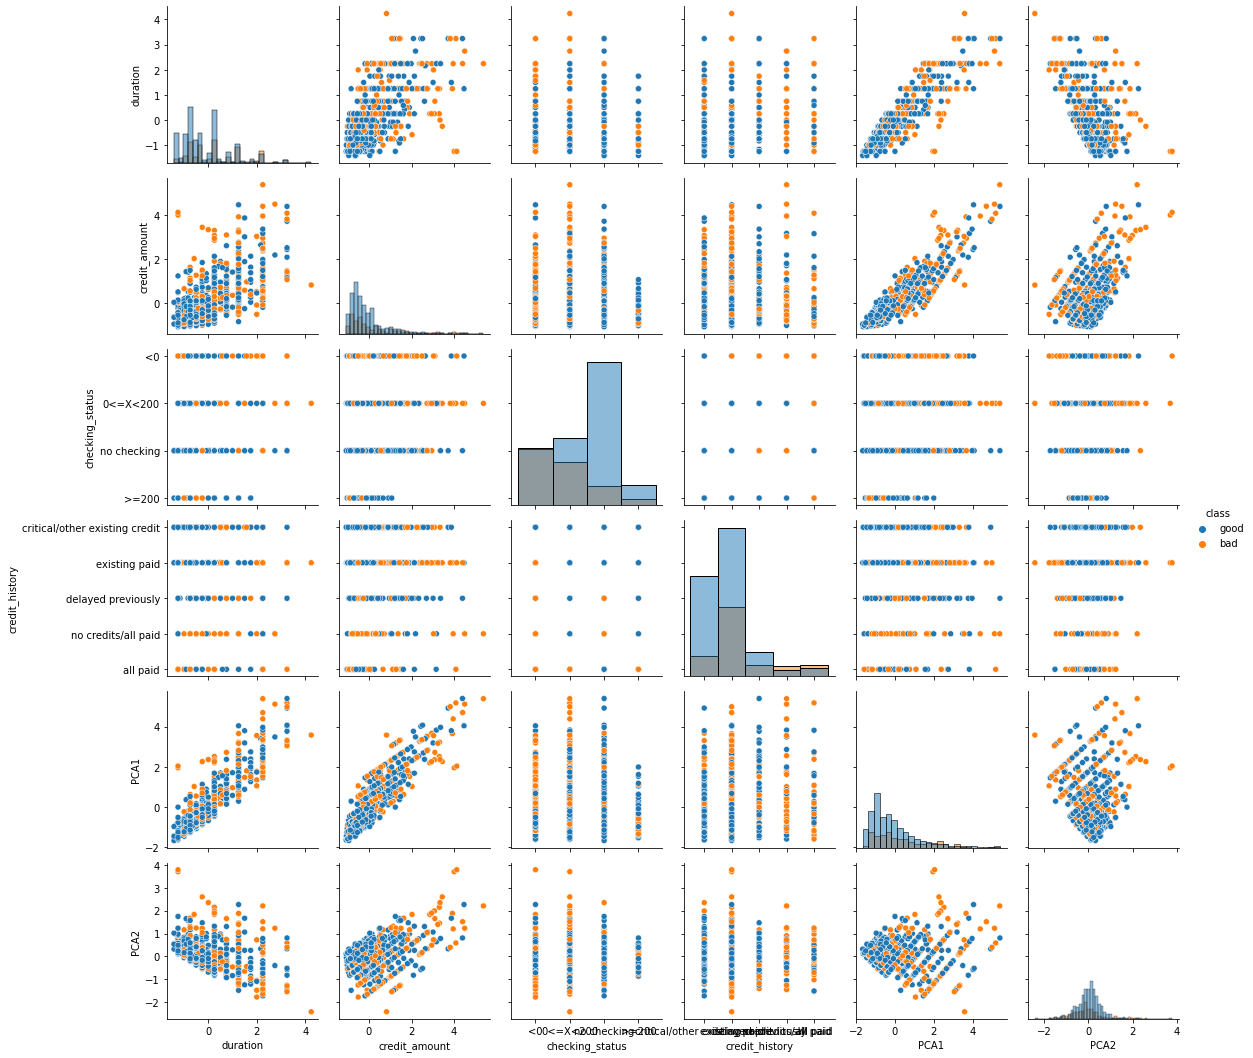

In [70]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numerical_cols = list(numerical_features.columns)[:2]
ordinal_cols = list(Ordinal_Features.columns)[:2]
target_col = 'class'

selected_cols = numerical_cols + ordinal_cols + [target_col]
selected_df = credit_df[selected_cols].copy()

selected_df[numerical_cols] = (selected_df[numerical_cols] - selected_df[numerical_cols].mean()) / selected_df[numerical_cols].std()

pca = PCA(n_components=2)
pca_components = pca.fit_transform(selected_df[numerical_cols])

selected_df['PCA1'] = pca_components[:, 0]
selected_df['PCA2'] = pca_components[:, 1]

g = sns.PairGrid(selected_df, vars=numerical_cols+ordinal_cols+['PCA1', 'PCA2'], hue=target_col)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.show()


     duration  credit_amount
0   -1.235859      -0.744759
1    2.247070       0.949342
2   -0.738298      -0.416354
3    1.749509       1.633430
4    0.256825       0.566380
..        ...            ...
995 -0.738298      -0.543890
996  0.754386       0.207509
997 -0.738298      -0.874066
998  1.998289      -0.505275
999  1.998289       0.462226

[1000 rows x 2 columns]


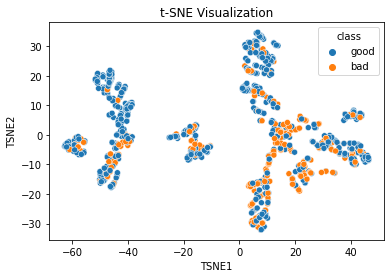

In [77]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

selected_cols = numerical_cols + ordinal_cols + [target_col]
selected_df = credit_df[selected_cols].copy()

selected_df[numerical_cols] = (selected_df[numerical_cols] - selected_df[numerical_cols].mean()) / selected_df[numerical_cols].std()

tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(selected_df[numerical_cols + ordinal_cols])

selected_df['TSNE1'] = embedded_features[:, 0]
selected_df['TSNE2'] = embedded_features[:, 1]

sns.scatterplot(data=selected_df, x='TSNE1', y='TSNE2', hue=target_col)
plt.title('t-SNE Visualization')
plt.show()


In [ ]:
x===1

SyntaxError: invalid syntax (Temp/ipykernel_46524/2784139477.py, line 1)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=credit_df.drop(['class'],axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(credit_df['class'])


In [79]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [80]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 

numerical_cols = list(numerical_features.columns)
categorical_cols = list(Categorical_Features.columns)
ordinal_cols = list(Ordinal_Features.columns)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler()) 
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('ordinal', OrdinalEncoder())  
])
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols),
        ('ordinal', ordinal_transformer, ordinal_cols)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),

])

pipeline.fit(X_train, y_train)
X_train_preprocessed = pipeline.transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logistic_regression_params = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
random_forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC()
logistic_regression_grid = GridSearchCV(logistic_regression, logistic_regression_params, cv=5)
random_forest_grid = GridSearchCV(random_forest, random_forest_params, cv=5)
svm_grid = GridSearchCV(svm, svm_params, cv=5)
logistic_regression_grid.fit(X_train_preprocessed, y_train)
random_forest_grid.fit(X_train_preprocessed, y_train)
svm_grid.fit(X_train_preprocessed, y_train)




In [82]:
print("Logistic Regression - Best Hyperparameters:", logistic_regression_grid.best_params_)
print("Logistic Regression - Best Score:", logistic_regression_grid.best_score_)
print("Random Forest - Best Hyperparameters:", random_forest_grid.best_params_)
print("Random Forest - Best Score:", random_forest_grid.best_score_)
print('SVM - Best Hyperparameters:',svm_grid.best_params_)
print('SVM - Best Score:',svm_grid.best_score_)

Logistic Regression - Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Logistic Regression - Best Score: 0.7342857142857143
Random Forest - Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Random Forest - Best Score: 0.7628571428571428
SVM - Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
SVM - Best Score: 0.7342857142857143


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
best_classifier = random_forest_grid.best_estimator_
y_pred = best_classifier.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.76
Precision: 0.77
Recall: 0.94
F1-Score: 0.85
Confusion Matrix:
[[ 31  60]
 [ 12 197]]


In [84]:
import pandas as pd
classifiers = [
    ('Logistic Regression', logistic_regression_params, logistic_regression_grid.best_score_),
    ('Random Forest', random_forest_params, random_forest_grid.best_score_),
    ('SVM', svm_params, svm_grid.best_score_)
]
results_df = pd.DataFrame(columns=['Classifier', 'Parameters', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for classifier_name, params, best_score in classifiers:
    row = {
        'Classifier': classifier_name,
        'Parameters': params,
        'Accuracy': None,
        'Precision': None,
        'Recall': None,
        'F1-Score': None
    }
    classifier = None
    if classifier_name == 'Logistic Regression':
        classifier = logistic_regression_grid.best_estimator_
    elif classifier_name == 'Random Forest':
        classifier = random_forest_grid.best_estimator_
    elif classifier_name == 'SVM':
        classifier = svm_grid.best_estimator_
    y_pred = classifier.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    row['Accuracy'] = accuracy
    row['Precision'] = precision
    row['Recall'] = recall
    row['F1-Score'] = f1
    results_df = results_df.append(row, ignore_index=True)
display(results_df)


,Classifier,Parameters,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,"{'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}",0.726667,0.750988,0.909091,0.822511
1,Random Forest,"{'n_estimators': [100, 200, 300], 'max_depth':...",0.760000,0.766537,0.942584,0.845494
2,SVM,"{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}",0.730000,0.748062,0.923445,0.826552
